# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

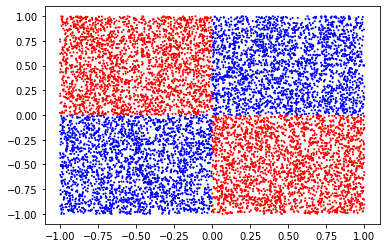

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Generating the data
np.random.seed(42)
N = 10000
X = np.random.uniform(-1, 1, size=(N, 2))
y = np.logical_xor(X[:, 0] >= 0, X[:, 1] >= 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting DecisionTreeClassifier
min_max_depth = None
for max_depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))

    if train_accuracy > 0.99:
        min_max_depth = max_depth
        break



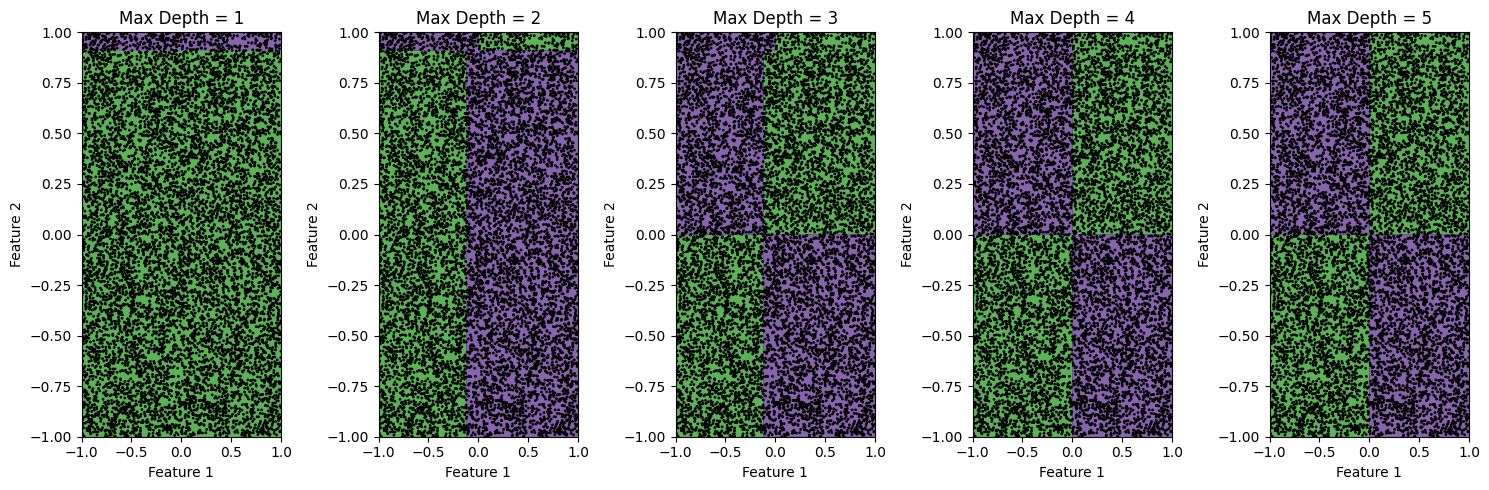

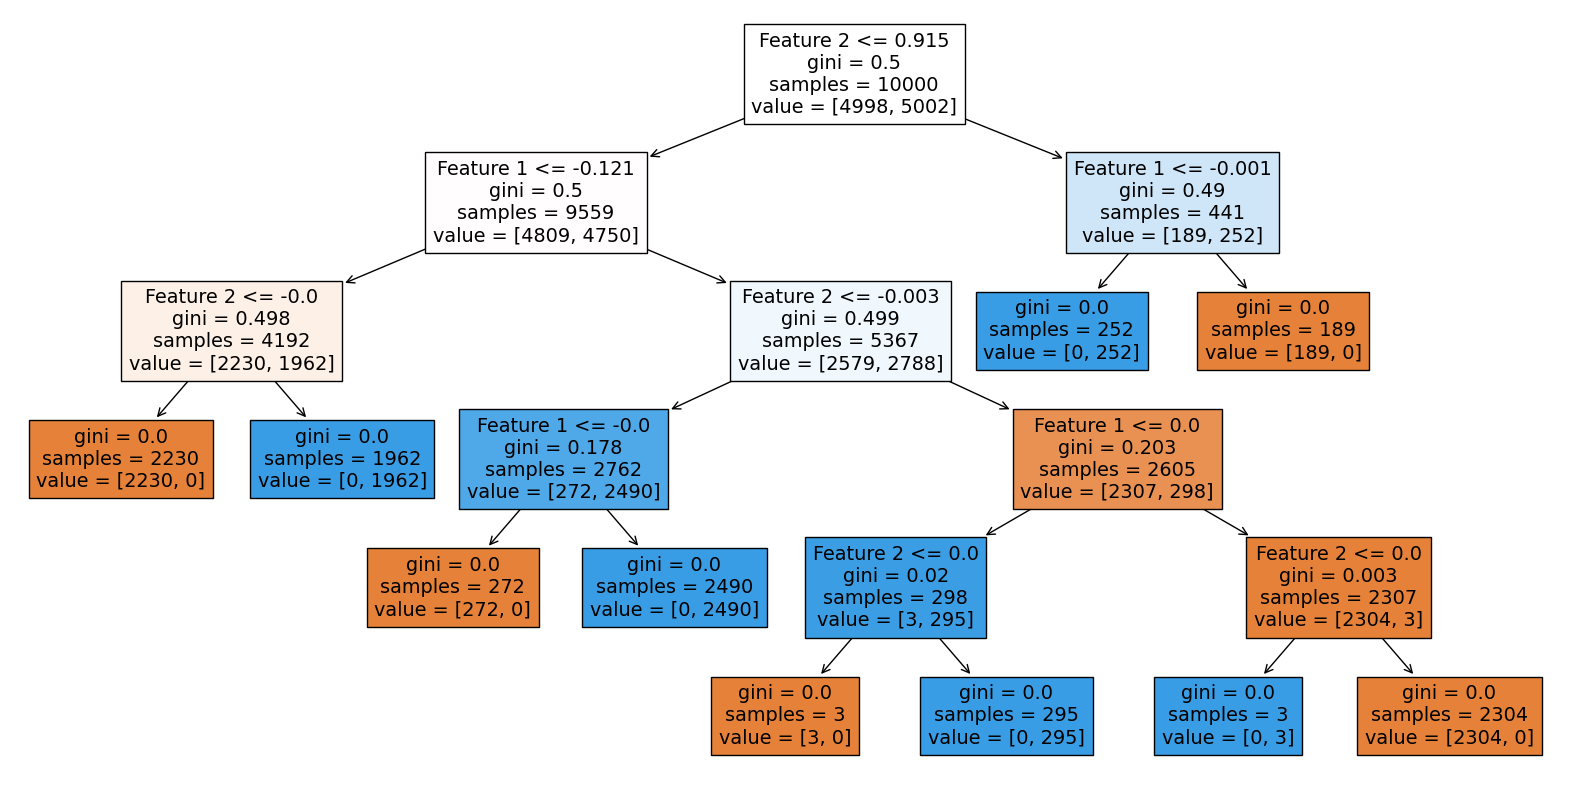

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Generating the data
np.random.seed(42)
N = 10000
X = np.random.uniform(-1, 1, size=(N, 2))
y = np.logical_xor(X[:, 0] >= 0, X[:, 1] >= 0)

# Fitting DecisionTreeClassifier
min_max_depth = None
for max_depth in range(1, 20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))

    if train_accuracy > 0.99:
        min_max_depth = max_depth
        break

# Plotting part for each max_depth
plt.figure(figsize=(15, 5))
for i, max_depth in enumerate(range(1, min_max_depth + 1)):
    plt.subplot(1, min_max_depth, i + 1)

    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, s=1)
    plt.title(f'Max Depth = {max_depth}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

clf = DecisionTreeClassifier(max_depth=min_max_depth, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'])
plt.show()


# Task 2 (3 points)

Consider the following dataset:

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

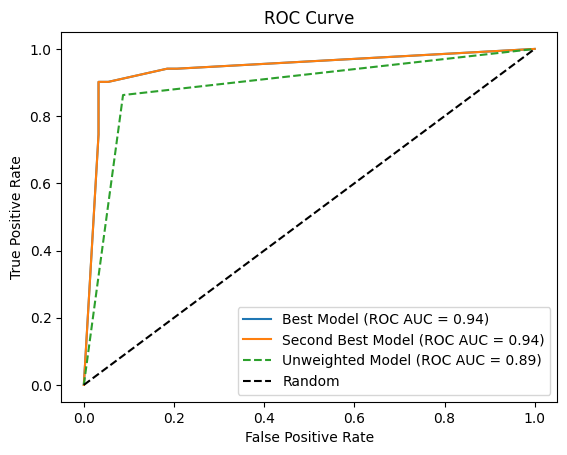

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

clf = DecisionTreeClassifier(random_state=12345)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
}

weighted_clf = DecisionTreeClassifier(class_weight={'malignant': 2., 'benign': 1.}, random_state=12345)

grid_search = GridSearchCV(weighted_clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

# Fitting the best classifier on training data
best_clf.fit(X_train, y_train)

# Getting predictions and ROC AUC scores for test data, and plotting
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = roc_curve(y_test == 'malignant', y_pred_proba)
plt.plot(fpr, tpr, label=f'Best Model (ROC AUC = {roc_auc:.2f})')

# Finding second-best model
second_best_clf = grid_search.best_estimator_
second_best_clf.fit(X_train, y_train)
y_pred_proba_second = second_best_clf.predict_proba(X_test)[:, 1]
roc_auc_second = roc_auc_score(y_test, y_pred_proba_second)

fpr_second, tpr_second, _ = roc_curve(y_test == 'malignant', y_pred_proba_second)
plt.plot(fpr_second, tpr_second, label=f'Second Best Model (ROC AUC = {roc_auc_second:.2f})')

# ROC curve for a model without class weights
clf.fit(X_train, y_train)
y_pred_proba_unweighted = clf.predict_proba(X_test)[:, 1]
roc_auc_unweighted = roc_auc_score(y_test, y_pred_proba_unweighted)
fpr_unweighted, tpr_unweighted, _ = roc_curve(y_test == 'malignant', y_pred_proba_unweighted)
plt.plot(fpr_unweighted, tpr_unweighted, label=f'Unweighted Model (ROC AUC = {roc_auc_unweighted:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Plot ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Use binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Original classifier without class weights
clf = DecisionTreeClassifier(random_state=12345)
clf.fit(X_train, y_train)

# Classifier with class weights
weighted_clf = DecisionTreeClassifier(class_weight={0: 2., 1: 1.}, random_state=12345)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
}

grid_search = GridSearchCV(weighted_clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 2.0, 1: 1.0},
                                              random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10]},
             scoring='roc_auc')